# Demo of spectral extractions and analysis on an example dataset from GO-2561 (UNCOVER)

*Spectral analysis*

fitting for redshift, line flux, etc. based on the 1d spectral extraction using `msaexp`

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import yaml

import astropy.units as u
import astropy.io.fits as pyfits

import mastquery.utils
from grizli import utils
import msaexp.slit_combine
import msaexp.spectrum
import msaexp

print('msaexp version: ', msaexp.__version__)

msaexp version:  0.9.9.dev21+gae09813


In [2]:
prog = 2561
progstr = 'jw02561'
rootdir = '/Users/xwang/data/NIRSpec/go2561_uncover_westlake/DR250705'
os.chdir(rootdir)

outroot = 'uncover-v3'

## using the 1D spectrum 

see papers by 

In [7]:
spec_file = 'uncover-v3_prism-clear_2561_17467.spec.fits'

spec_hdu = pyfits.open(spec_file)
spec_hdu.info()

Filename: uncover-v3_prism-clear_2561_17467.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPEC1D        1 BinTableHDU    396   501R x 10C   [D, D, D, D, D, D, D, D, D, D]   
  2  SCI           1 ImageHDU       371   (501, 27)   float64   
  3  WHT           1 ImageHDU       371   (501, 27)   float64   
  4  PROFILE       1 ImageHDU       371   (501, 27)   float64   
  5  PROF1D        1 BinTableHDU     25   27R x 3C   [D, D, D]   
  6  BACKGROUND    1 ImageHDU       371   (501, 27)   float64   
  7  SLITS         1 BinTableHDU    107   17R x 49C   [55A, K, K, D, D, D, D, D, K, 10A, D, D, D, D, 3A, K, K, D, D, K, K, K, K, K, K, K, 4A, 5A, 5A, 29A, K, K, D, K, K, K, 12A, D, D, D, D, 17A, K, K, 25A, K, K, D, D]   


In [8]:
spec = utils.read_catalog(spec_file)
spec.info()

<GTable length=501>
    name     dtype  unit    class     n_bad
----------- ------- ---- ------------ -----
       wave float64   um       Column     0
       flux float64  uJy MaskedColumn    77
        err float64  uJy MaskedColumn    77
        sky float64  uJy MaskedColumn    77
  path_corr float64      MaskedColumn    77
       npix float64            Column     0
  norm_corr float64      MaskedColumn    77
   flux_sum float64            Column     0
profile_sum float64            Column     0
    var_sum float64            Column     0


In [9]:
# Lots of metadata
print(yaml.dump(dict(spec.meta)))

ACT_ID: '01'
APERNAME: NRS_FULL_MSA
APER_DY: 1
APER_Y0: 13
BARTDELT: 398.999692
BAR_CORR_MODE: wave
BENDTIME: 60157.159778
BKGDTARG: false
BMIDTIME: 60157.156654
BSTRTIME: 60157.153530
BUNIT: microJansky
CALCREF: 2
CAL_VCS: RELEASE
CAL_VER: 1.16.0
CATEGORY: GO
COMPRESS: false
CRDS_CTX: jwst_1312.pmap
CRDS_VER: 12.1.5
CROWDFLD: false
DATAMODE: 58
DATAMODL: SlitModel
DATAPROB: false
DATE: '2025-07-05T04:09:39.975'
DATE-BEG: '2023-08-01T03:34:25.977'
DATE-END: '2023-08-01T03:43:25.766'
DATE-OBS: '2023-08-01'
DEC_REF: -30.368672
DEC_V1: -30.481845
DETECTOR: NRS1
DIFFS: false
DILATE_FAILED_OPEN: true
DISPAXIS: 1
DRPFRMS1: 0
DRPFRMS3: 0
DURATION: 539.789000
EFFEXPTM: 525.200000
EFFINTTM: 525.200000
EGROUP0: 2
EGROUP1: 1
EGROUP2: 3
ENGQLPTG: CALCULATED_TRACK_TR_202111
ENG_QUAL: OK
EPH_TIME: 60157.152036
EPH_TYPE: Definitive
EXPCOUNT: 4
EXPEND: 60157.155159
EXPMID: 60157.152036
EXPOSURE: '2'
EXPRIPAR: PRIME
EXPSTART: 60157.148912
EXPTIME: 8724.900000
EXP_ONLY: false
EXP_TYPE: NRS_MSASPEC
EXTNA

In [8]:
mast.info()

<GTable length=431>
      name        dtype     unit       class     n_bad
---------------- ------- ---------- ------------ -----
      WAVELENGTH float64         um       Column     0
            FLUX float64         Jy       Column     0
      FLUX_ERROR float64         Jy MaskedColumn    24
FLUX_VAR_POISSON float64        Jy2 MaskedColumn    24
 FLUX_VAR_RNOISE float64        Jy2 MaskedColumn    23
   FLUX_VAR_FLAT float64        Jy2 MaskedColumn    23
     SURF_BRIGHT float64   MJy / sr       Column     0
        SB_ERROR float64   MJy / sr       Column     0
  SB_VAR_POISSON float64 MJy2 / sr2       Column     0
   SB_VAR_RNOISE float64 MJy2 / sr2       Column     0
     SB_VAR_FLAT float64 MJy2 / sr2       Column     0
              DQ  uint32                  Column     0
      BACKGROUND float64   MJy / sr       Column     0
      BKGD_ERROR float64   MJy / sr       Column     0
BKGD_VAR_POISSON float64 MJy2 / sr2       Column     0
 BKGD_VAR_RNOISE float64 MJy2 / sr2       Col

# Plot the spectrum

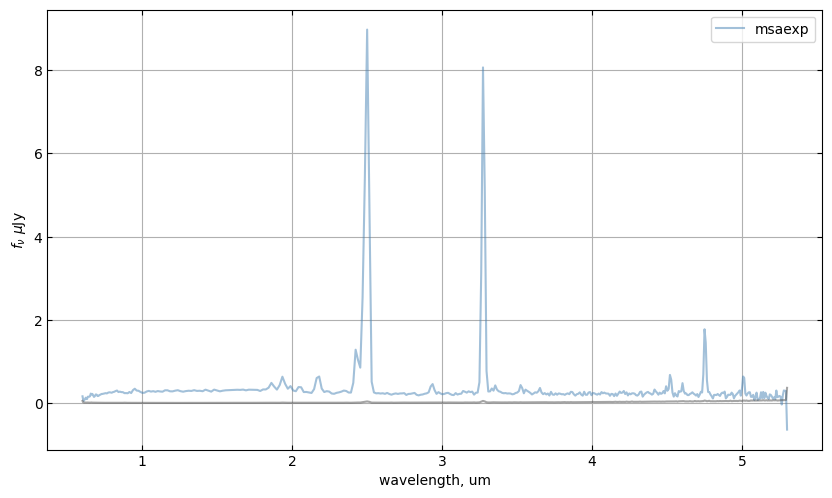

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

pl = ax.plot(spec['wave'], spec['flux'], label='msaexp', color='steelblue', alpha=0.5)
ax.plot(spec['wave'], spec['err'], color='0.3', alpha=0.5)

# pl = ax.plot(mast['WAVELENGTH'], mast['FLUX'].to('microJansky'), label='MAST', color='0.3', alpha=0.5)
# ax.plot(mast['WAVELENGTH'], mast['FLUX_ERROR'].to('microJansky'), color=pl[0].get_color(), alpha=0.5)

ax.legend()

ax.set_xlabel('wavelength, um')
ax.set_ylabel(r'$f_\nu$ $\mu$Jy')
ax.grid()

# Fitting templates to MSAEXP spectra

# (2025-07-05 04:31:56.096)

spectrum.fit_redshift(**{'file': 'uncover-v3_prism-clear_2561_17467.spec.fits', 'z0': [1, 6], 'zstep': None, 'nspline': None, 'scale_disp': 1.3, 'vel_width': 100, 'Rline': None, 'is_prism': False, 'use_full_dispersion': False, 'ranges': None, 'sys_err': 0.02, 'kwargs': {'scale_uncertainty_kwargs': {}}, 'froot': 'uncover-v3_prism-clear_2561_17467'})



627it [00:05, 108.64it/s]
101it [00:00, 138.15it/s]


calc_uncertainty_scale: Mask additional 10 pixels
calc_uncertainty_scale: sys_err = 0.0200
calc_uncertainty_scale: coeffs = [0.04657536]
calc_uncertainty_scale: NMAD = 1.001
calc_uncertainty_scale: Set SCALE_UNCERTAINTY: [0.04657536]

# line flux err
# flux x 10^-20 erg/s/cm2
# uncover-v3_prism-clear_2561_17467.spec.fits
# z = 3.98600
# Sat Jul  5 12:32:03 2025
            line Lya     -901.1 ±    578.1 (EW=    -55.2)
      line OIII-1663      272.5 ±     97.9 (EW=     23.3)
      line NIII-1750      -62.4 ±     95.3 (EW=     -6.0)
      line CIII-1906      823.8 ±     97.8 (EW=     97.1)
           line MgII       -7.3 ±     63.6 (EW=     -1.6)
       line NeV-3346       22.6 ±     48.9 (EW=      6.6)
      line NeVI-3426       -3.1 ±     46.9 (EW=     -1.0)
            line OII      534.5 ±     50.0 (EW=    196.3)
       line HeI-3889      902.6 ±     50.4 (EW=    378.3)
     line NeIII-3968      204.3 ±     39.1 (EW=     91.8)
             line Hd      310.1 ±     37.5 (EW=    156.8

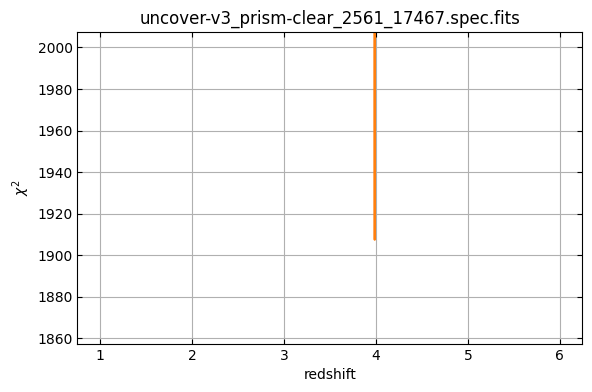

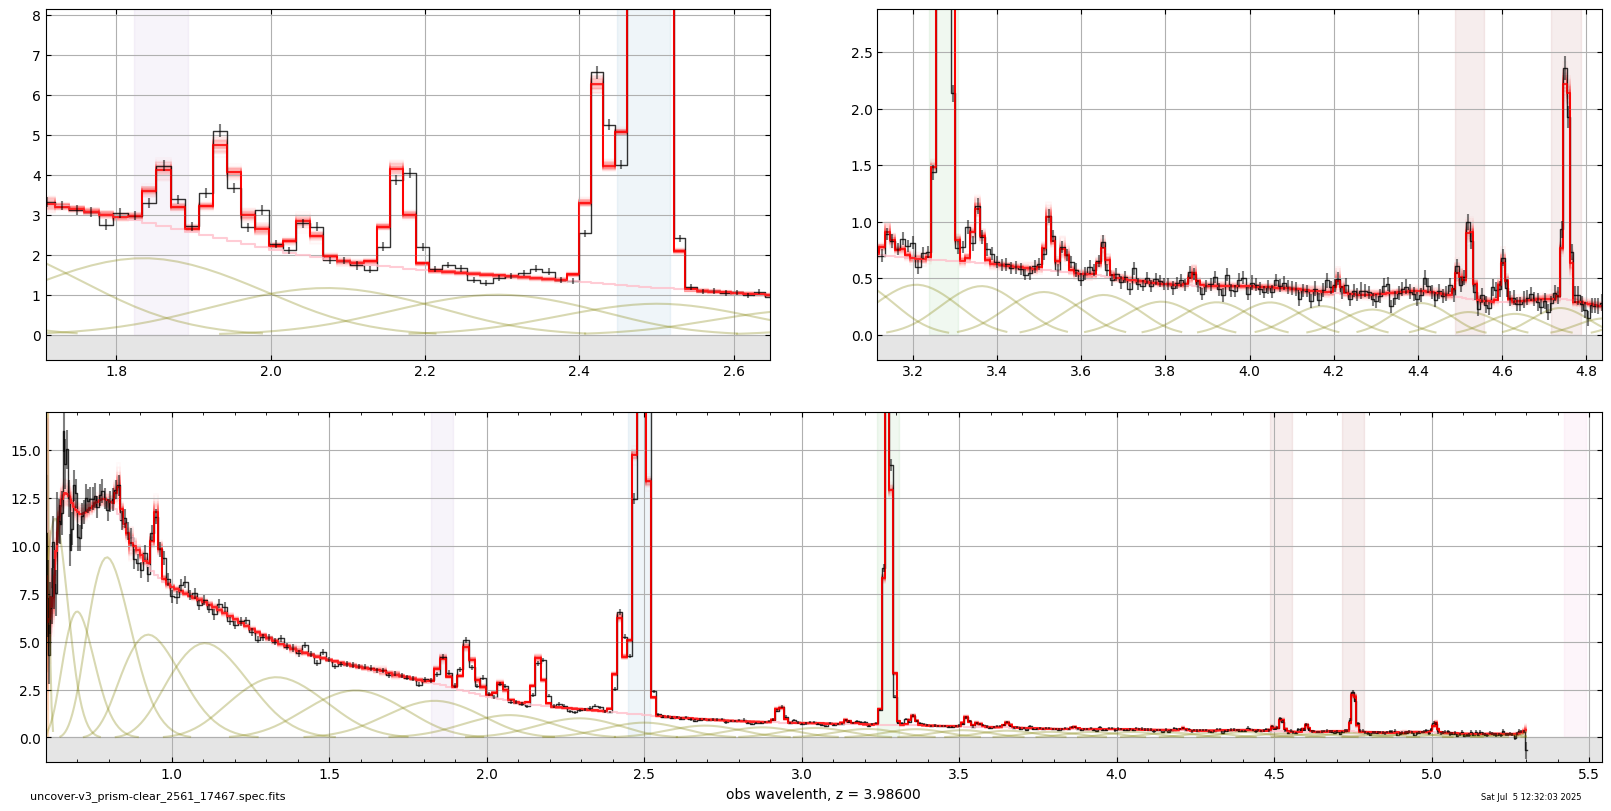

In [12]:
fig, fit_table, fit_result = msaexp.spectrum.fit_redshift(
    spec_file,
    z0=[1,6],
    scale_uncertainty_kwargs={},
)

## Fitting pieces

In [13]:
# Spectrum object - read the spectrum table and add helper methods for fitting
sampler = msaexp.spectrum.SpectrumSampler(spec_file)

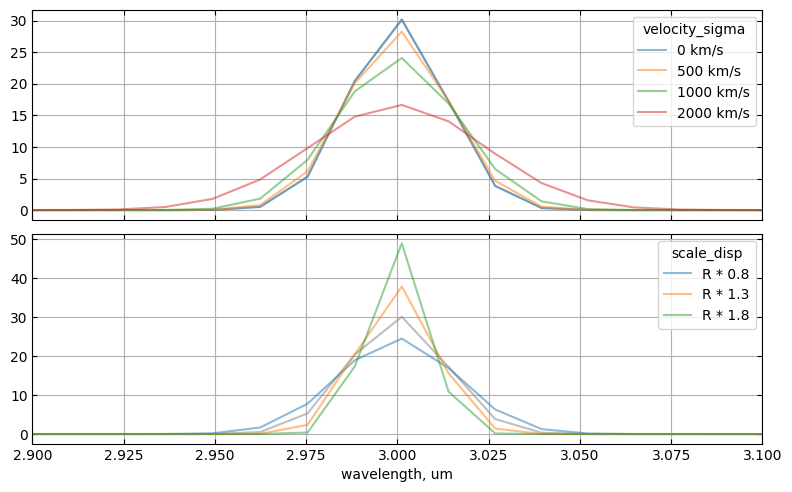

In [14]:
# Generate a single emission line

line_wave = 3.0 # microns

line_i = sampler.fast_emission_line(
    line_wave,
    line_flux=1.0,
    scale_disp=1.0,
    velocity_sigma=100,
)

fig, axes = plt.subplots(2,1,figsize=(8,5), sharex=True)
for ax in axes:
    ax.plot(sampler['wave'], line_i, color='0.5', alpha=0.5)

# Vary line velocity
ax = axes[0]
for velocity_sigma in [0, 500, 1000, 2000]:
    line_i = sampler.fast_emission_line(
        line_wave,
        line_flux=1.0,
        scale_disp=1.0,
        velocity_sigma=velocity_sigma,
    )
    axes[0].plot(sampler['wave'], line_i, label=f'{velocity_sigma} km/s', alpha=0.5)

leg = ax.legend()
leg.set_title('velocity_sigma')

# Vary scale_disp
ax = axes[1]
for scale_disp in [0.8, 1.3, 1.8]:
    line_i = sampler.fast_emission_line(
        line_wave,
        line_flux=1.0,
        scale_disp=scale_disp,
        velocity_sigma=100,
    )
    axes[1].plot(sampler['wave'], line_i, label=f'R * {scale_disp:.1f}', alpha=0.5)

leg = ax.legend()
leg.set_title('scale_disp')

for ax in axes:
    ax.grid()
    ax.set_xlim(line_wave - 0.1, line_wave + 0.1)

ax.set_xlabel('wavelength, um')
fig.tight_layout(pad=1)


In [15]:
# Spline functions for continuum
nspline = 21
bsplines = sampler.bspline_array(nspline=nspline, get_matrix=True)

In [16]:
# Helper for generating emission lines
z = fit_result['z']
_ = msaexp.spectrum.make_templates(sampler, z, bspl=bsplines)
templ_names, is_em_line, templ_matrix = _

print('\n'.join(templ_names))

spl 0
spl 1
spl 2
spl 3
spl 4
spl 5
spl 6
spl 7
spl 8
spl 9
spl 10
spl 11
spl 12
spl 13
spl 14
spl 15
spl 16
spl 17
spl 18
spl 19
spl 20
line Lya
line OIII-1663
line NIII-1750
line CIII-1906
line MgII
line NeV-3346
line NeVI-3426
line OII
line HeI-3889
line NeIII-3968
line Hd
line Hg
line Hb
line OIII
line HeI-5877
line OI-6302
line Ha+NII
line SII
line HeI-7065
line ArIII-7138
line OII-7325
line ArIII-7753
line HeI-8446
line Pa10
line SIII-9068
line Pa9
line SIII-9531
line Pa8
line CI-9850
line PaD


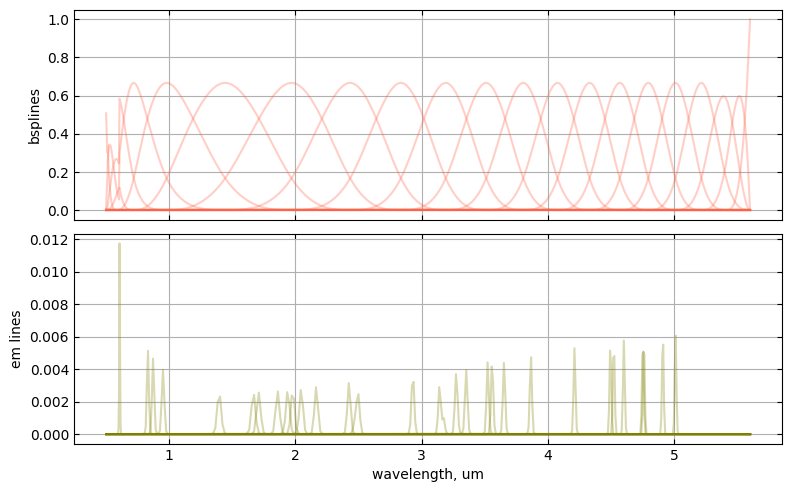

In [17]:
fig, axes = plt.subplots(2,1,figsize=(8,5), sharex=True)
_ = axes[0].plot(sampler['wave'], templ_matrix[~is_em_line].T, alpha=0.3, color='tomato')
axes[0].set_ylabel('bsplines')

_ = axes[1].plot(sampler['wave'], templ_matrix[is_em_line].T, alpha=0.3, color='olive')
axes[1].set_ylabel('em lines')
for ax in axes:
    ax.grid()

ax.set_xlabel('wavelength, um')
fig.tight_layout(pad=1)

### Fit the template matrix to the spectrum with least squares


In [18]:
# Weighted by uncertainties
A = (templ_matrix / sampler['full_err']).T
b = sampler['flux'] / sampler['full_err']

coeffs = np.linalg.lstsq(A[sampler['valid'],:], b[sampler['valid']], rcond=None)

model = templ_matrix.T.dot(coeffs[0])
model_components = templ_matrix.T*coeffs[0]

# Mask for plot
model_components[model_components < 1.e-3] = np.nan

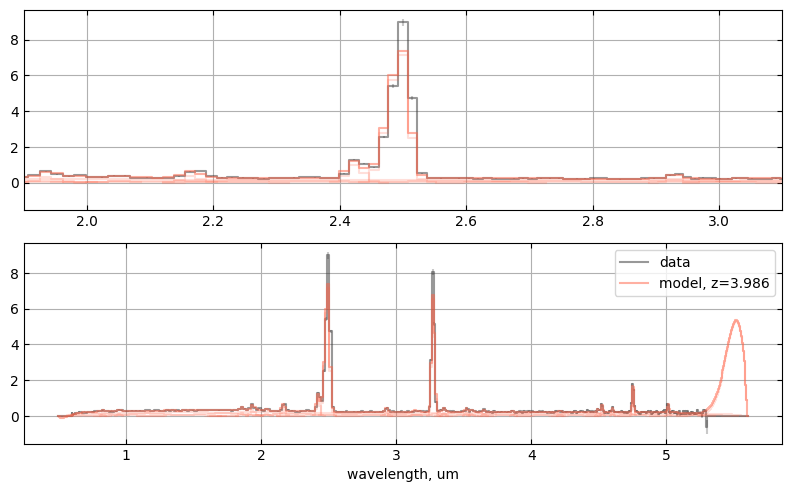

In [21]:
fig, axes = plt.subplots(2,1,figsize=(8,5))

for ax in axes:
    _ = ax.errorbar(sampler['wave'], sampler['flux'], sampler['full_err'],
                    linestyle='None', alpha=0.3, color='0.3', marker='None')
    
    ax.step(sampler['wave'], sampler['flux'], color='0.2', where='mid', alpha=0.5, label='data')
    
    ax.step(sampler['wave'], model, color='tomato', where='mid', alpha=0.5, label=f'model, z={z:.3f}')
    ax.step(sampler['wave'], model_components, color='tomato', where='mid', alpha=0.2)
    
    ax.grid()

axes[0].set_xlim(1.9, 3.1)

ax.legend()
ax.set_xlabel('wavelength, um')
fig.tight_layout(pad=1)
